In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import re

- kamus_gender = {"M" : 0, "F" : 1, "None" : None}
- kamus_trip = {"trip" : 0, "round": 1, "roundtrip" : 2}
- kamus_service = {"ECONOMY" : 0, "BUSINESS": 1}
- kamus_tx = {"NO" : 0, "YES" : 1}
- kamus_airlines = {'33199710eb822fbcfd0dc793f4788d30': 0,
                  '0a102015e48c1f68e121acc99fca9a05': 1,
                  '6c483c0812c96f8ec43bb0ff76eaf716': 2,
                  'ad5bef60d81ea077018f4d50b813153a': 3,
                  'e35de6a36d385711a660c72c0286154a': 4,
                  '74c5549aa99d55280a896ea50068a211': 5,
                  '9855a1d3de1c46526dde37c5d6fb758c': 6,
                  '6872b49542519aea7ae146e23fab5c08': 7}

In [2]:
flight = pd.read_csv("E:/Tugas Kuliah/Semester 7/datavidia/flight.csv")
flight.head()

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction
0,912aa410a02cd7e1bab414214a7005c0,5c6f39c690f23650d3cde28e5b51c908,566.0,M,trip,ECONOMY,885898.00,NO,1.0,33199710eb822fbcfd0dc793f4788d30,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'"
1,d64a90a618202a5e8b25d8539377f3ca,5cbef2b87f51c18bf399d11bfe495a46,607.0,M,trip,ECONOMY,2139751.25,NO,2.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8..."
2,1a42ac02bcb4a902973123323f84da55,38fc35a1e62384012a358ab1fbd5ad03,648.0,F,trip,ECONOMY,2695550.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836...."
3,92cddd64d4be4dec6dfbcc0c50e902f4,c7f54cb748828b4413e02dea2758faf6,418.0,F,trip,ECONOMY,1146665.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'"
4,bf637abc47ea93bad22264f4956d67f6,dec228e4d2b6023c9f1fe9cfe9c451bf,537.0,F,trip,ECONOMY,1131032.50,NO,1.0,6c483c0812c96f8ec43bb0ff76eaf716,CGK - DPS,None,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0..."


### Replace None with NaN

In [3]:
flight.replace(to_replace=['None'], value=np.nan, inplace=True)
flight.head()

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction
0,912aa410a02cd7e1bab414214a7005c0,5c6f39c690f23650d3cde28e5b51c908,566.0,M,trip,ECONOMY,885898.00,NO,1.0,33199710eb822fbcfd0dc793f4788d30,CGK - DPS,NaN,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'"
1,d64a90a618202a5e8b25d8539377f3ca,5cbef2b87f51c18bf399d11bfe495a46,607.0,M,trip,ECONOMY,2139751.25,NO,2.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,NaN,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8..."
2,1a42ac02bcb4a902973123323f84da55,38fc35a1e62384012a358ab1fbd5ad03,648.0,F,trip,ECONOMY,2695550.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,NaN,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836...."
3,92cddd64d4be4dec6dfbcc0c50e902f4,c7f54cb748828b4413e02dea2758faf6,418.0,F,trip,ECONOMY,1146665.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,NaN,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'"
4,bf637abc47ea93bad22264f4956d67f6,dec228e4d2b6023c9f1fe9cfe9c451bf,537.0,F,trip,ECONOMY,1131032.50,NO,1.0,6c483c0812c96f8ec43bb0ff76eaf716,CGK - DPS,NaN,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0..."


### Empty value cleaning

In [4]:
flight.isnull().sum()

account_id                   0
order_id                     0
member_duration_days         0
gender                      24
trip                         0
service_class                0
price                        0
is_tx_promo                  0
no_of_seats                  0
airlines_name                0
route                        0
hotel_id                111198
visited_city                 0
log_transaction              0
dtype: int64

In [5]:
flight = flight.dropna(subset=['gender'])
flight.isnull().sum()

account_id                   0
order_id                     0
member_duration_days         0
gender                       0
trip                         0
service_class                0
price                        0
is_tx_promo                  0
no_of_seats                  0
airlines_name                0
route                        0
hotel_id                111176
visited_city                 0
log_transaction              0
dtype: int64

### Useless Columns
- route
- order_id

In [6]:
df = flight.drop(['route','order_id'], axis=1)

Tipe data tiap kolom

- account_id identifier
- member duration days = nominal, menunjukkan jumlah
- gender non weighted binary
- trip nominal
- service class = ordinal, binary
- price = continue
- is tx promo = binary
- no_of_seats = nominal jumlah
- airlines_names = nominal
- hotel_id = parse ke binary
- visited_city = list string
- log_trans = list float

## ide feature

- berapa banyak kota yang dikunjungi?
- kota mulai?
- kota akhir?
- melalui kota x?
- apakah mengunjungi lebih dari n kota?
- mean log_trans
- repeat customer? (dari log_trans)
- is alone? (seat number)

### Explode Categorical columns

In [7]:
df['airlines_name'] = pd.factorize(df.airlines_name)[0]
df['airlines_name'] = df['airlines_name'].astype("category")

df = pd.get_dummies(df, columns=['gender','trip','airlines_name'])

df.head()

,account_id,member_duration_days,service_class,price,is_tx_promo,no_of_seats,hotel_id,visited_city,log_transaction,gender_F,...,trip_roundtrip,trip_trip,airlines_name_0,airlines_name_1,airlines_name_2,airlines_name_3,airlines_name_4,airlines_name_5,airlines_name_6,airlines_name_7
0,912aa410a02cd7e1bab414214a7005c0,566.0,ECONOMY,885898.00,NO,1.0,NaN,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'",0,...,0,1,1,0,0,0,0,0,0,0
1,d64a90a618202a5e8b25d8539377f3ca,607.0,ECONOMY,2139751.25,NO,2.0,NaN,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8...",0,...,0,1,0,1,0,0,0,0,0,0
2,1a42ac02bcb4a902973123323f84da55,648.0,ECONOMY,2695550.00,NO,1.0,NaN,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836....",1,...,0,1,0,1,0,0,0,0,0,0
3,92cddd64d4be4dec6dfbcc0c50e902f4,418.0,ECONOMY,1146665.00,NO,1.0,NaN,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'",1,...,0,1,0,1,0,0,0,0,0,0
4,bf637abc47ea93bad22264f4956d67f6,537.0,ECONOMY,1131032.50,NO,1.0,NaN,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0...",1,...,0,1,0,0,1,0,0,0,0,0


### Numerize binary column
- service class
- is_tx_promo
- hotel_id

In [8]:
# service class
df['service_class'] = df['service_class'].map({'ECONOMY':0, 'BUSINESS':1})

# is_tx_promo
df['is_tx_promo'] = df['is_tx_promo'].map({'NO':0, 'YES':1})

# hotel_id
df['hotel_id'] = df['hotel_id'].notnull().astype(int)

df.head()

,account_id,member_duration_days,service_class,price,is_tx_promo,no_of_seats,hotel_id,visited_city,log_transaction,gender_F,...,trip_roundtrip,trip_trip,airlines_name_0,airlines_name_1,airlines_name_2,airlines_name_3,airlines_name_4,airlines_name_5,airlines_name_6,airlines_name_7
0,912aa410a02cd7e1bab414214a7005c0,566.0,0,885898.00,0,1.0,0,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'",0,...,0,1,1,0,0,0,0,0,0,0
1,d64a90a618202a5e8b25d8539377f3ca,607.0,0,2139751.25,0,2.0,0,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8...",0,...,0,1,0,1,0,0,0,0,0,0
2,1a42ac02bcb4a902973123323f84da55,648.0,0,2695550.00,0,1.0,0,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836....",1,...,0,1,0,1,0,0,0,0,0,0
3,92cddd64d4be4dec6dfbcc0c50e902f4,418.0,0,1146665.00,0,1.0,0,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'",1,...,0,1,0,1,0,0,0,0,0,0
4,bf637abc47ea93bad22264f4956d67f6,537.0,0,1131032.50,0,1.0,0,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0...",1,...,0,1,0,0,1,0,0,0,0,0


### Get average price per seat

In [9]:
df['price_avg'] = df['price'] / df['no_of_seats']
df.head()

,account_id,member_duration_days,service_class,price,is_tx_promo,no_of_seats,hotel_id,visited_city,log_transaction,gender_F,...,trip_trip,airlines_name_0,airlines_name_1,airlines_name_2,airlines_name_3,airlines_name_4,airlines_name_5,airlines_name_6,airlines_name_7,price_avg
0,912aa410a02cd7e1bab414214a7005c0,566.0,0,885898.00,0,1.0,0,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'",0,...,1,1,0,0,0,0,0,0,0,885898.000
1,d64a90a618202a5e8b25d8539377f3ca,607.0,0,2139751.25,0,2.0,0,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8...",0,...,1,0,1,0,0,0,0,0,0,1069875.625
2,1a42ac02bcb4a902973123323f84da55,648.0,0,2695550.00,0,1.0,0,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836....",1,...,1,0,1,0,0,0,0,0,0,2695550.000
3,92cddd64d4be4dec6dfbcc0c50e902f4,418.0,0,1146665.00,0,1.0,0,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'",1,...,1,0,1,0,0,0,0,0,0,1146665.000
4,bf637abc47ea93bad22264f4956d67f6,537.0,0,1131032.50,0,1.0,0,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0...",1,...,1,0,0,1,0,0,0,0,0,1131032.500


In [10]:
account_grouped = df.groupby('account_id').count()
account_grouped = account_grouped.rename(columns={'service_class':'count'})
df = df.join(account_grouped['count'].reset_index().set_index('account_id'), on='account_id')
df.head()

,account_id,member_duration_days,service_class,price,is_tx_promo,no_of_seats,hotel_id,visited_city,log_transaction,gender_F,...,airlines_name_0,airlines_name_1,airlines_name_2,airlines_name_3,airlines_name_4,airlines_name_5,airlines_name_6,airlines_name_7,price_avg,count
0,912aa410a02cd7e1bab414214a7005c0,566.0,0,885898.00,0,1.0,0,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'",0,...,1,0,0,0,0,0,0,0,885898.000,2
1,d64a90a618202a5e8b25d8539377f3ca,607.0,0,2139751.25,0,2.0,0,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8...",0,...,0,1,0,0,0,0,0,0,1069875.625,3311
2,1a42ac02bcb4a902973123323f84da55,648.0,0,2695550.00,0,1.0,0,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836....",1,...,0,1,0,0,0,0,0,0,2695550.000,3
3,92cddd64d4be4dec6dfbcc0c50e902f4,418.0,0,1146665.00,0,1.0,0,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'",1,...,0,1,0,0,0,0,0,0,1146665.000,1
4,bf637abc47ea93bad22264f4956d67f6,537.0,0,1131032.50,0,1.0,0,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0...",1,...,0,0,1,0,0,0,0,0,1131032.500,161


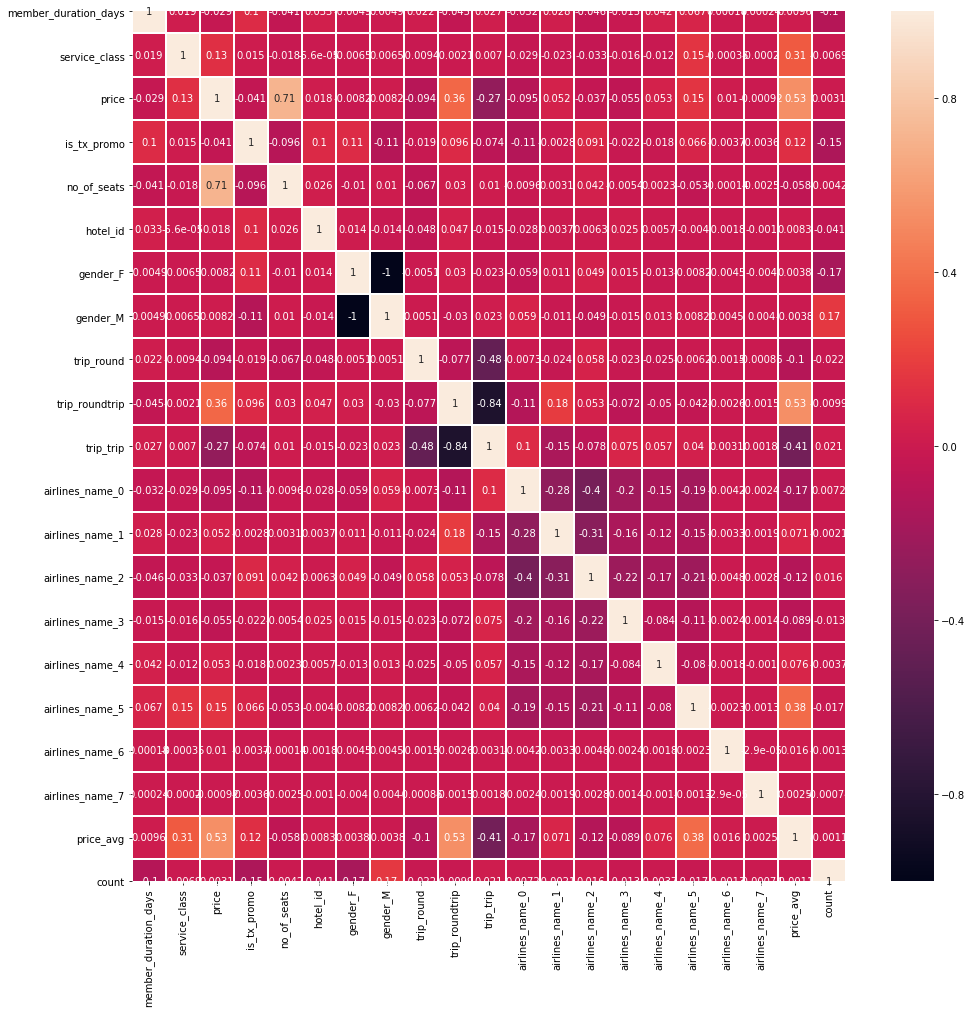

In [11]:
fig, ax = plt.subplots(figsize=[16,16])
sns.heatmap(df.corr(), ax=ax, linewidth=1, annot=True)

In [12]:
#changing visited_city and log trans into usable
temp = []
for value in df["log_transaction"]:
    value = value [2:-2]
    a = value.split(',')
    to_float = lambda x : [float(p) for p in x]
    a = to_float(a)
    temp.append(a)
df["log_transaction"] = temp


temp = []
for value in df["visited_city"]:
    value = value [2:-2]
    a = value.split(',')
    cell = []
    for word in a:
        cell.append(re.sub('[^A-Za-z0-9]+', '', word))
    temp.append(cell)
df["visited_city"] = temp

df.head()

,account_id,member_duration_days,service_class,price,is_tx_promo,no_of_seats,hotel_id,visited_city,log_transaction,gender_F,...,airlines_name_0,airlines_name_1,airlines_name_2,airlines_name_3,airlines_name_4,airlines_name_5,airlines_name_6,airlines_name_7,price_avg,count
0,912aa410a02cd7e1bab414214a7005c0,566.0,0,885898.00,0,1.0,0,"[Semarang, Jakarta, Medan, Bali]","[545203.03, 918492.11, 1774241.4, 885898.0]",0,...,1,0,0,0,0,0,0,0,885898.000,2
1,d64a90a618202a5e8b25d8539377f3ca,607.0,0,2139751.25,0,2.0,0,"[Jakarta, Medan, Bali]","[555476.36, 2422826.84, 7398697.64, 7930866.8,...",0,...,0,1,0,0,0,0,0,0,1069875.625,3311
2,1a42ac02bcb4a902973123323f84da55,648.0,0,2695550.00,0,1.0,0,"[Semarang, Jakarta, Medan, Bali]","[7328957.45, 7027662.34, 1933360.88, 3461836.8...",1,...,0,1,0,0,0,0,0,0,2695550.000,3
3,92cddd64d4be4dec6dfbcc0c50e902f4,418.0,0,1146665.00,0,1.0,0,"[Jogjakarta, Bali, Jakarta, Medan]","[5243631.69, 2474344.48, 1146665.0]",1,...,0,1,0,0,0,0,0,0,1146665.000,1
4,bf637abc47ea93bad22264f4956d67f6,537.0,0,1131032.50,0,1.0,0,"[Jakarta, Bali, Medan, Jogjakarta, Semarang]","[9808972.98, 9628619.79, 6712680.0, 5034510.0,...",1,...,0,0,1,0,0,0,0,0,1131032.500,161


In [18]:
df['visited_count'] = df['visited_city'].map(lambda x: len(x))
df.head()

,account_id,member_duration_days,service_class,price,is_tx_promo,no_of_seats,hotel_id,visited_city,log_transaction,gender_F,...,airlines_name_1,airlines_name_2,airlines_name_3,airlines_name_4,airlines_name_5,airlines_name_6,airlines_name_7,price_avg,count,visited_count
0,912aa410a02cd7e1bab414214a7005c0,566.0,0,885898.00,0,1.0,0,"[Semarang, Jakarta, Medan, Bali]","[545203.03, 918492.11, 1774241.4, 885898.0]",0,...,0,0,0,0,0,0,0,885898.000,2,4
1,d64a90a618202a5e8b25d8539377f3ca,607.0,0,2139751.25,0,2.0,0,"[Jakarta, Medan, Bali]","[555476.36, 2422826.84, 7398697.64, 7930866.8,...",0,...,1,0,0,0,0,0,0,1069875.625,3311,3
2,1a42ac02bcb4a902973123323f84da55,648.0,0,2695550.00,0,1.0,0,"[Semarang, Jakarta, Medan, Bali]","[7328957.45, 7027662.34, 1933360.88, 3461836.8...",1,...,1,0,0,0,0,0,0,2695550.000,3,4
3,92cddd64d4be4dec6dfbcc0c50e902f4,418.0,0,1146665.00,0,1.0,0,"[Jogjakarta, Bali, Jakarta, Medan]","[5243631.69, 2474344.48, 1146665.0]",1,...,1,0,0,0,0,0,0,1146665.000,1,4
4,bf637abc47ea93bad22264f4956d67f6,537.0,0,1131032.50,0,1.0,0,"[Jakarta, Bali, Medan, Jogjakarta, Semarang]","[9808972.98, 9628619.79, 6712680.0, 5034510.0,...",1,...,0,1,0,0,0,0,0,1131032.500,161,5


In [20]:
df['transaction_mean'] = df['log_transaction'].map(lambda x: np.mean(x))
df['transaction_stdev'] = df['log_transaction'].map(lambda x: np.std(x))
df.head()

,account_id,member_duration_days,service_class,price,is_tx_promo,no_of_seats,hotel_id,visited_city,log_transaction,gender_F,...,airlines_name_3,airlines_name_4,airlines_name_5,airlines_name_6,airlines_name_7,price_avg,count,visited_count,transaction_mean,transaction_stdev
0,912aa410a02cd7e1bab414214a7005c0,566.0,0,885898.00,0,1.0,0,"[Semarang, Jakarta, Medan, Bali]","[545203.03, 918492.11, 1774241.4, 885898.0]",0,...,0,0,0,0,0,885898.000,2,4,1.030959e+06,4.533539e+05
1,d64a90a618202a5e8b25d8539377f3ca,607.0,0,2139751.25,0,2.0,0,"[Jakarta, Medan, Bali]","[555476.36, 2422826.84, 7398697.64, 7930866.8,...",0,...,0,0,0,0,0,1069875.625,3311,3,2.646397e+06,2.624008e+06
2,1a42ac02bcb4a902973123323f84da55,648.0,0,2695550.00,0,1.0,0,"[Semarang, Jakarta, Medan, Bali]","[7328957.45, 7027662.34, 1933360.88, 3461836.8...",1,...,0,0,0,0,0,2695550.000,3,4,4.489474e+06,2.250021e+06
3,92cddd64d4be4dec6dfbcc0c50e902f4,418.0,0,1146665.00,0,1.0,0,"[Jogjakarta, Bali, Jakarta, Medan]","[5243631.69, 2474344.48, 1146665.0]",1,...,0,0,0,0,0,1146665.000,1,4,2.954880e+06,1.706745e+06
4,bf637abc47ea93bad22264f4956d67f6,537.0,0,1131032.50,0,1.0,0,"[Jakarta, Bali, Medan, Jogjakarta, Semarang]","[9808972.98, 9628619.79, 6712680.0, 5034510.0,...",1,...,0,0,0,0,0,1131032.500,161,5,4.362199e+06,3.006539e+06


In [21]:
df.to_csv('E:/processed_flight.csv')

## Algorithm Starts Here

In [22]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
data = df.drop(['account_id', 'visited_city', 'log_transaction', 'hotel_id'])
target = df['hotel_id']
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(data, target)

E:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: setting an array element with a sequence.